# **Space X  Falcon 9 First Stage Landing Prediction**


## Lab 2: Data wrangling


In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   Exploratory Data Analysis
*   Determine Training Labels


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries.


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

### Data Analysis


Load Space X dataset, from last section.


In [5]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute


In [6]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

Identify which columns are numerical and categorical:


In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### TASK 1: Calculate the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>


Next, let's see the number of launches for each site.

Use the method  <code>value_counts()</code> on the column <code>LaunchSite</code> to determine the number of launches  on each site:


In [5]:
# Apply value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types:


*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[11] </a>

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


### TASK 2: Calculate the number and occurrence of each orbit


Use the method  <code>.value_counts()</code> to determine the number and occurrence of each orbit in the  column <code>Orbit</code>


In [6]:
# Apply value_counts on Orbit column
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
GEO       1
HEO       1
SO        1
ES-L1     1
Name: Orbit, dtype: int64

### TASK 3: Calculate the number and occurence of mission outcome per orbit type


Use the method <code>.value_counts()</code> on the column <code>Outcome</code> to determine the number of <code>landing_outcomes</code>.Then assign it to a variable landing_outcomes.


In [7]:
# landing_outcomes = values on Outcome column
landing_outcomes=df['Outcome'].value_counts()
print(landing_outcomes)

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64


<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [8]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:


In [29]:
success= landing_outcomes.keys()[[0,2,4]]
w =landing_outcomes.sum()
success
#x= success/landing_outcomes.sum


Index(['True ASDS', 'True RTLS', 'True Ocean'], dtype='object')

In [13]:
bad_outcomes= set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes


{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

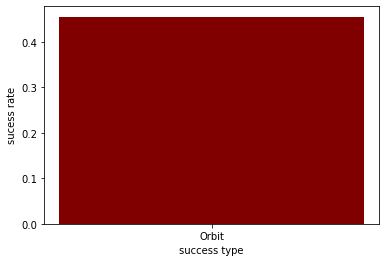

In [39]:
numb=[41,14,5]
y=numb/w

plt.bar('Orbit', y, color ='maroon',
        width = 0.4)
 
plt.xlabel("success type")
plt.ylabel("sucess rate")
#plt.title("Succes landings rate")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

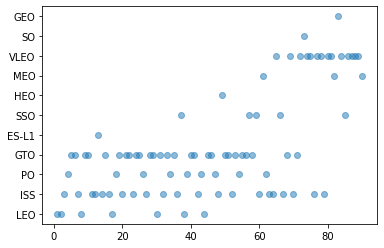

In [41]:
#flight number vs orbit type scatter plot
x= df['FlightNumber']
y= df['Orbit']
plt.scatter(x, y, alpha=0.5)
plt.show()

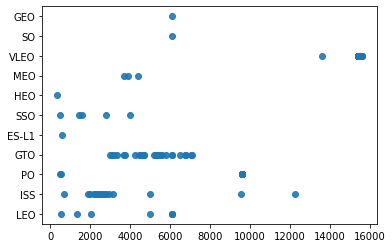

In [44]:
x= df['PayloadMass']
y= df['Orbit']
plt.scatter(x, y, alpha=0.9)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


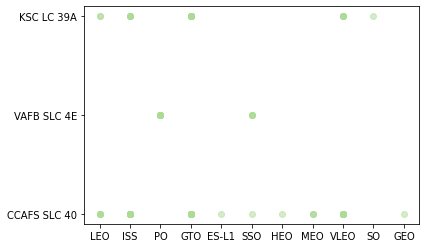

In [14]:
x = df['Orbit']
y = df['LaunchSite']
colors = np.random.rand(3)


plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


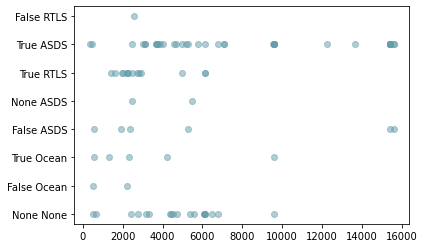

In [116]:
x = df['PayloadMass']
y = df['Outcome']
colors = np.random.rand(3)


plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [72]:
#yearly average success rate

import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
yr = 2010
list_yr = []
list_rate=[]
while yr < 2021:
    outcome_type_year = df.loc[df['year'] == yr, 'Outcome']
    numb_success = sum((itm.count("True") for itm in outcome_type_year ))
    numb_outcomes= df.loc[df['year'] == yr, 'Outcome'].count()
    if numb_outcomes == 0:
        list_yr.append(yr)
        list_rate.append(0)
        yr+=1
    else:   
        rate = numb_success/numb_outcomes
        list_yr.append(yr)
        list_rate.append(rate)
        yr+=1


#df['Date']



In [109]:
df.loc[df.groupby('BoosterVersion')['PayloadMass'].idxmax()]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,year
68,69,2019-11-11,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.577366,28.561857,2019


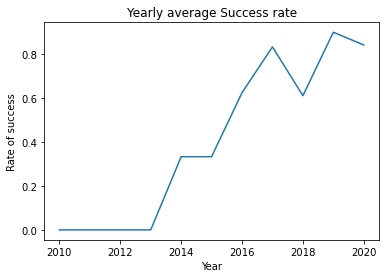

In [74]:
plt.plot(list_yr,list_rate)
plt.title('Yearly average Success rate')
plt.xlabel('Year')
plt.ylabel('Rate of success')
plt.show()

In [93]:
booster=sum(df['PayloadMass'])
num = df['PayloadMass'].count()
booster/num

6104.959411764707

In [87]:
df[df['LaunchSite'].str.contains("CCA")].head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,2014


In [97]:
#True RTLS
out = df[df['Outcome']== 'True ASDS']
less = out[out['PayloadMass']<6000]
more = less[less['PayloadMass']>4000]
print(more)

    FlightNumber       Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
20            21 2016-05-06       Falcon 9       4696.0   GTO  CCAFS SLC 40   
23            24 2016-08-14       Falcon 9       4600.0   GTO  CCAFS SLC 40   
28            29 2017-03-30       Falcon 9       5300.0   GTO    KSC LC 39A   
39            40 2017-10-11       Falcon 9       5200.0   GTO    KSC LC 39A   
54            55 2018-08-07       Falcon 9       5800.0   GTO  CCAFS SLC 40   
69            70 2019-12-05       Falcon 9       5000.0   ISS  CCAFS SLC 40   

      Outcome  Flights  GridFins  Reused  Legs                LandingPad  \
20  True ASDS        1      True   False  True  5e9e3032383ecb6bb234e7ca   
23  True ASDS        1      True   False  True  5e9e3032383ecb6bb234e7ca   
28  True ASDS        2      True    True  True  5e9e3032383ecb6bb234e7ca   
39  True ASDS        2      True    True  True  5e9e3032383ecb6bb234e7ca   
54  True ASDS        2      True    True  True  5e9e3032383ecb6bb2

In [115]:
#df[df['Outcome'].str.contains("True")].head()
outcome_false = df[df['Outcome']== 'False ASDS']

false_2015 = outcome_false[outcome_false['year']==2015]

BV=false_2015['BoosterVersion']

LS= false_2015['LaunchSite']

print(BV,LS)


11    Falcon 9
13    Falcon 9
Name: BoosterVersion, dtype: object 11    CCAFS SLC 40
13    CCAFS SLC 40
Name: LaunchSite, dtype: object


In [75]:
df['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

### TASK 4: Create a landing outcome label from Outcome column


Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


In [15]:
landing_class = 0 if bad_outcome
landing_class = 1 otherwise

SyntaxError: invalid syntax (515788421.py, line 1)

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully


In [ ]:
df['Class']=landing_class
df[['Class']].head(8)

In [ ]:
df.head(5)

We can use the following line of code to determine  the success rate:


In [ ]:
df["Class"].mean()

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>df.to_csv("dataset_part\_2.csv", index=False)</code>


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [8]:
Feature = df[['PayloadMass','Flights','Block','ReusedCount','Longitude','Latitude']]
Feature = pd.concat([Feature,pd.get_dummies(df[['Orbit','LaunchSite','GridFins','Reused','Legs']])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
#

,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,GridFins,Reused,Legs,Orbit_ES-L1,...,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,6104.959412,1,1.0,0,-80.577366,28.561857,False,False,False,0,...,0,1,0,0,0,0,0,1,0,0
1,525.000000,1,1.0,0,-80.577366,28.561857,False,False,False,0,...,0,1,0,0,0,0,0,1,0,0
2,677.000000,1,1.0,0,-80.577366,28.561857,False,False,False,0,...,1,0,0,0,0,0,0,1,0,0
3,500.000000,1,1.0,0,-120.610829,34.632093,False,False,False,0,...,0,0,0,1,0,0,0,0,0,1
4,3170.000000,1,1.0,0,-80.577366,28.561857,False,False,False,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#df[['GridFins','Reused','Legs','LandingPad']] = (df[['GridFins','Reused','Legs','LandingPad']] == 'TRUE').astype(int)
Feature = df[['PayloadMass','Flights','Block','ReusedCount','Longitude','Latitude']

Feature = pd.concat([Feature,pd.get_dummies(df['Orbit'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
             

SyntaxError: invalid syntax (823311123.py, line 4)

In [11]:
X = Feature
y = df['Outcome'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

K- Nearest Neighbors

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred0 = classifier.predict(X_test)

Decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Vector Support Machine

In [17]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm

In [18]:
clf1 = svm.SVC()
clf1.fit(X_train, y_train)
y_pred1=clf1.predict(X_test)

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [20]:
clf2 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

Model Evaluation

In [21]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [30]:
#k-neghbors
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
jac_k = jaccard_score(y_test, y_pred0, average=None)
print(jac_k)

[[0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 2 0 5 0 0]
 [0 0 0 2 7 0]
 [0 0 0 0 0 1]]
              precision    recall  f1-score   support

  False ASDS       0.00      0.00      0.00         1
 False Ocean       0.00      0.00      0.00         0
   None ASDS       0.00      0.00      0.00         0
   None None       0.71      0.71      0.71         7
   True ASDS       1.00      0.78      0.88         9
   True RTLS       1.00      1.00      1.00         1

    accuracy                           0.72        18
   macro avg       0.45      0.42      0.43        18
weighted avg       0.83      0.72      0.77        18

[1.         1.         0.88888889 0.5       ]


In [23]:
#decision tree
DT_Jscore=jaccard_score(y_test, y_pred, average=None)
DT_F1score= f1_score(y_test, y_pred, average=None)
print(DT_Jscore)
print(DT_F1score)

[0.         0.         0.         0.55555556 0.77777778 1.        ]
[0.         0.         0.         0.71428571 0.875      1.        ]


In [24]:
#SVM
SVM_J=jaccard_score(y_test, y_pred1, average=None)
SVM_f1=f1_score(y_test, y_pred1, average=None)
print(SVM_J)
print(SVM_f1)

[0.         0.57142857 0.7        0.16666667]
[0.         0.72727273 0.82352941 0.28571429]


In [28]:
#log regression
LR_J=jaccard_score(y_test, y_pred2, average=None)
LR_f1 = f1_score(y_test, y_pred1, average=None)
#LR_log= metrics.log_loss(y_test, y_pred2)
 
print(LR_J)
print(LR_f1)
#print(LR_log)

[0.33333333 0.         0.57142857 0.77777778 0.         1.        ]
[0.         0.72727273 0.82352941 0.28571429]


In [34]:
data = {'K-neighbors':jac_k[-1],'SVM':SVM_J[-1],'DS_tree':DT_Jscore[-1],'SVM':SVM_J[-1],'Log_Reg':LR_J[-1]}
model = list(data.keys())
values = list(data.values())

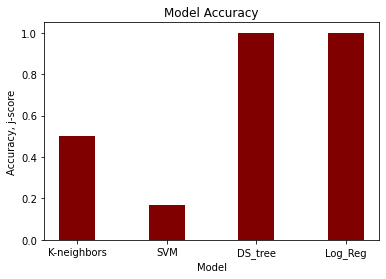

In [35]:
plt.bar(model, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Accuracy, j-score")
plt.title("Model Accuracy")
plt.show()

In [36]:
print(confusion_matrix(y_test, y_pred))

[[0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 2 0 5 0 0]
 [0 0 0 2 7 0]
 [0 0 0 0 0 1]]




## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Changed Markdown        |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-04        | 1.1.    | Nayef         | updating the input data |
| 2021-05-026       | 1.1.    | Joseph        | updating the input data |


Copyright © 2021 IBM Corporation. All rights reserved.
